## Tasks:

* #### What is the count of Customers segmentation?
* #### What is the count of Customers attributes?
* #### what is the average total sales according to Customer segmentation?
* #### what is the average total sales according to Customers Life stage?
* #### What are the most favorite products brand and size?
* #### Which stores made the heighst total sales?
* #### Which stores made the lowest total sales?
* #### What Customer type buys the most?
* #### At what date Sales are the heighst?
* #### At what date transactions are the heighst?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
behav_data = pd.read_csv('QVI_purchase_behaviour.csv')
trans_data = pd.read_excel('QVI_transaction_data.xlsx')


In [3]:
behav_data 

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [4]:
behav_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
behav_data.LIFESTAGE.value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [6]:
behav_data.PREMIUM_CUSTOMER.value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [7]:
behav_data.duplicated().unique()

array([False])

purchase_behaviour data is clean

In [8]:
trans_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [9]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [10]:
trans_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [11]:
trans_data.duplicated().value_counts()

False    264835
True          1
dtype: int64

In [12]:
trans_data[trans_data.duplicated(keep=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [13]:
trans_data.drop_duplicates(inplace=True)
trans_data.duplicated().value_counts()

False    264835
dtype: int64

In [14]:
trans_data.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

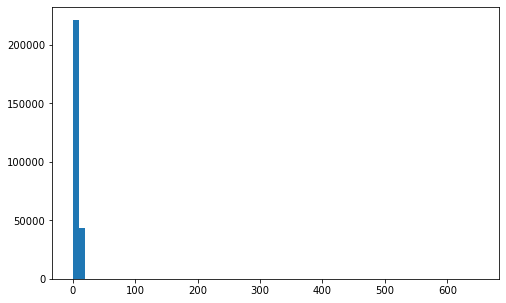

In [15]:
binsize = 10
bins = np.arange(0,trans_data['TOT_SALES'].max()+binsize , binsize)
plt.figure(figsize=[8, 5])
plt.hist(data= trans_data , x = 'TOT_SALES',bins = bins);

In [16]:
trans_data[trans_data.TOT_SALES > 100].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


#### We have 2 outliers that will affect our analysis , we need to drop them

In [17]:
trans_data = trans_data[trans_data.TOT_SALES < 100]
trans_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264833.000000,264833.000000,2.648330e+05,2.648330e+05,264833.000000,264833.000000,264833.000000
mean,43464.036570,135.079529,1.355489e+05,1.351577e+05,56.583598,1.905812,7.299351
std,105.389061,76.784189,8.058003e+04,7.813305e+04,32.826498,0.343437,2.527244
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760000e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303570e+05,1.351370e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030940e+05,2.027000e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


Changing the date format to a more readable format

In [18]:
base_date = pd.Timestamp('1901-01-01')
trans_data = trans_data.copy()
trans_data.loc[:,'DATE'] = [base_date + pd.DateOffset(date_offset) for date_offset in trans_data.DATE]
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2019-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2020-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2020-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2019-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2019-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
trans_data['PROD_SIZE(g)'] = trans_data['PROD_NAME'].str.extract(r'([0-9]{1,3})')
trans_data['PROD_SIZE(g)'].value_counts()

175    66389
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PROD_SIZE(g), dtype: int64

In [20]:
trans_data['PROD_BRAND'] = trans_data['PROD_NAME'].str.split().str[0]
trans_data['PROD_BRAND'].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28859
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_BRAND, dtype: int64

In [21]:
trans_data['PROD_BRAND'].replace({'Dorito' : 'Doritos','Red':'Red Rock Deli','RRD':'Red Rock Deli','WW':'Woolworths'
                                  ,'Snbts':'Sunbites','Smith':'Smiths','Infzns':'Infuzions','NCC':'Natural ChipCo'
                                 ,'Natural' :'Natural ChipCo' ,'Old':'Old El Paso','Grain':'Grain Waves','GrnWves':'Grain Waves'
                                 ,'French':'French Fries','Burger' : 'Burger Rings'},inplace=True)
trans_data['PROD_BRAND'].value_counts()

Kettle            41288
Smiths            31822
Doritos           28145
Pringles          25102
Red Rock Deli     17779
Woolworths        14757
Infuzions         14201
Thins             14075
Cobs               9693
Tostitos           9471
Twisties           9454
Old El Paso        9324
Grain Waves        7740
Natural ChipCo     7469
Tyrrells           6442
Cheezels           4603
CCs                4551
Sunbites           3008
Cheetos            2927
Burger Rings       1564
French Fries       1418
Name: PROD_BRAND, dtype: int64

In [22]:
trans_data['STORE_NBR'] = 'Store ' + trans_data['STORE_NBR'].astype('str')

Now the teansactions data is clean enough

## Explanatory analysis

### Let's merge the two data frames into just one 

In [23]:
new_df = pd.merge(behav_data,trans_data,on='LYLTY_CARD_NBR')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264833 entries, 0 to 264832
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264833 non-null  int64         
 1   LIFESTAGE         264833 non-null  object        
 2   PREMIUM_CUSTOMER  264833 non-null  object        
 3   DATE              264833 non-null  datetime64[ns]
 4   STORE_NBR         264833 non-null  object        
 5   TXN_ID            264833 non-null  int64         
 6   PROD_NBR          264833 non-null  int64         
 7   PROD_NAME         264833 non-null  object        
 8   PROD_QTY          264833 non-null  int64         
 9   TOT_SALES         264833 non-null  float64       
 10  PROD_SIZE(g)      264833 non-null  object        
 11  PROD_BRAND        264833 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 26.3+ MB


In [24]:
new_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE(g),PROD_BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2019-10-19,Store 1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural ChipCo
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2019-09-18,Store 1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,Red Rock Deli
2,1003,YOUNG FAMILIES,Budget,2020-03-08,Store 1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,Grain Waves
3,1003,YOUNG FAMILIES,Budget,2020-03-09,Store 1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,Natural ChipCo
4,1004,OLDER SINGLES/COUPLES,Mainstream,2019-11-04,Store 1,5,96,WW Original Stacked Chips 160g,1,1.9,160,Woolworths
...,...,...,...,...,...,...,...,...,...,...,...,...
264828,2370701,YOUNG FAMILIES,Mainstream,2019-12-10,Store 88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,Grain Waves
264829,2370751,YOUNG FAMILIES,Premium,2019-10-03,Store 88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,Kettle
264830,2370961,OLDER FAMILIES,Budget,2019-10-26,Store 88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,Tyrrells
264831,2370961,OLDER FAMILIES,Budget,2019-10-29,Store 88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,Old El Paso


#### Let's see the count of different customer types

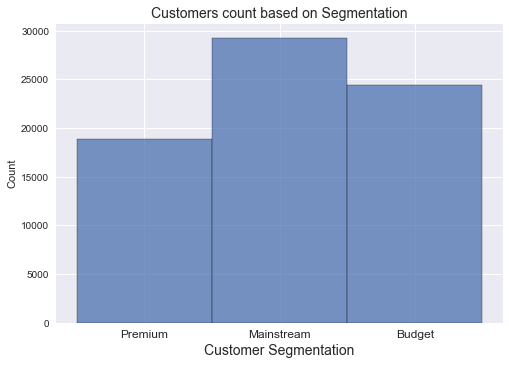

In [28]:
unique_members_df = new_df.drop_duplicates(subset=['LYLTY_CARD_NBR'])
plt.style.use('seaborn')
base_color = sb.color_palette()[0]
sb.histplot(unique_members_df['PREMIUM_CUSTOMER'],color=base_color)
plt.xlabel('Customer Segmentation',fontsize=14)
plt.xticks(fontsize=12)
plt.title('Customers count based on Segmentation',fontsize=14);

### What is the count of Customers segmentation?

> #### The mainstream customers are the most segmentation while the Premium customers are the lowest 

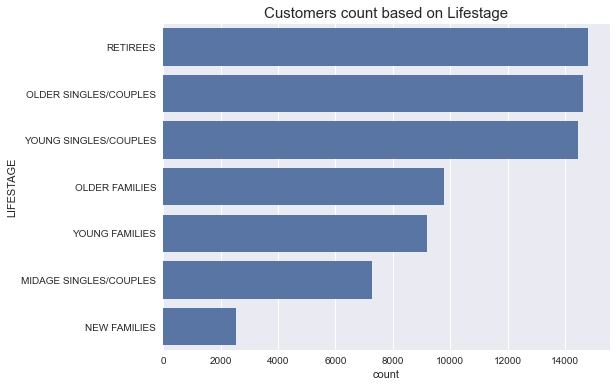

In [29]:
plt.figure(figsize=(8,6))

plt.style.use('seaborn')
sb.countplot(y=unique_members_df['LIFESTAGE'],order=unique_members_df['LIFESTAGE'].value_counts().index, color = base_color)
plt.title('Customers count based on Lifestage',fontsize=15);

### What is the count of Customers Lifestage?
> #### According to Lifestage Retires , Older and young single/couples are the most customers more than 14000 each, while New Families are the least about 2000 

### Now let's find out the average total sales according to the customer types

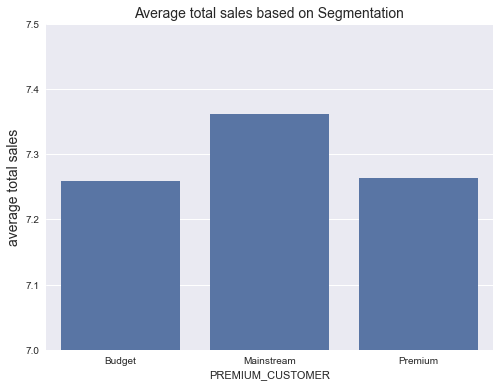

In [30]:
plt.figure(figsize=(8,6))
base_color = sb.color_palette()[0]
customer_data =new_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean()
plt.style.use('seaborn')
sb.barplot(x= customer_data.index, y =customer_data.values,color = base_color)
plt.ylim(7,7.5)
plt.ylabel('average total sales',fontsize=14)
plt.title('Average total sales based on Segmentation',fontsize=14);

### what is the average total sales according to Customer segmentation?
> #### Mainstream also has the highest average total sales with about 7.35 while Premium and Budget customers are very close to each other with about 7.25

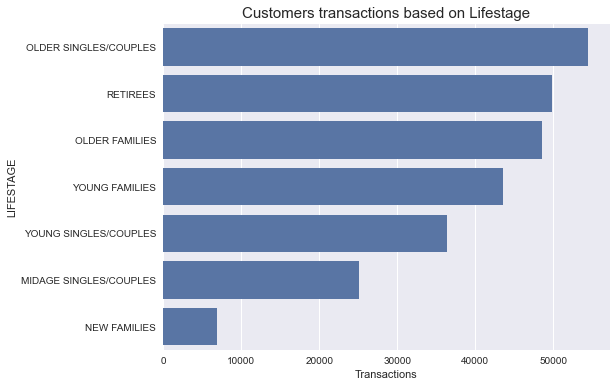

In [31]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
sb.countplot(y=new_df['LIFESTAGE'],order=new_df['LIFESTAGE'].value_counts().index, color = base_color)
plt.xlabel('Transactions')
plt.title('Customers transactions based on Lifestage',fontsize=15);

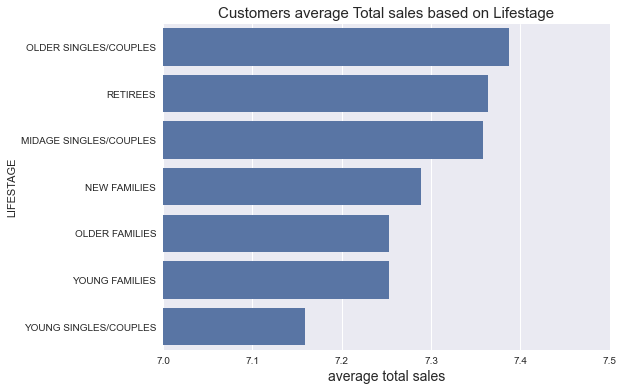

In [32]:
plt.figure(figsize=(8,6))
lifest_data = new_df.groupby('LIFESTAGE')['TOT_SALES'].mean()
plt.style.use('seaborn')
sb.barplot(x= lifest_data.values,y = lifest_data.index, color = base_color 
           , order =lifest_data.sort_values(ascending = False).index)
plt.xlim(7,7.5)
plt.xlabel('average total sales',fontsize=14)
plt.title('Customers average Total sales based on Lifestage',fontsize=15);

### what is the average total sales according to Customers Life stage?
> #### However Retiers Customers are more than Older singles/couples but the last one made more transantions and more average total sales , and while New families are the least category with fewer transactions but they have high avrage total sales.

### Now let's see the count of each customer lifestage and segmentation

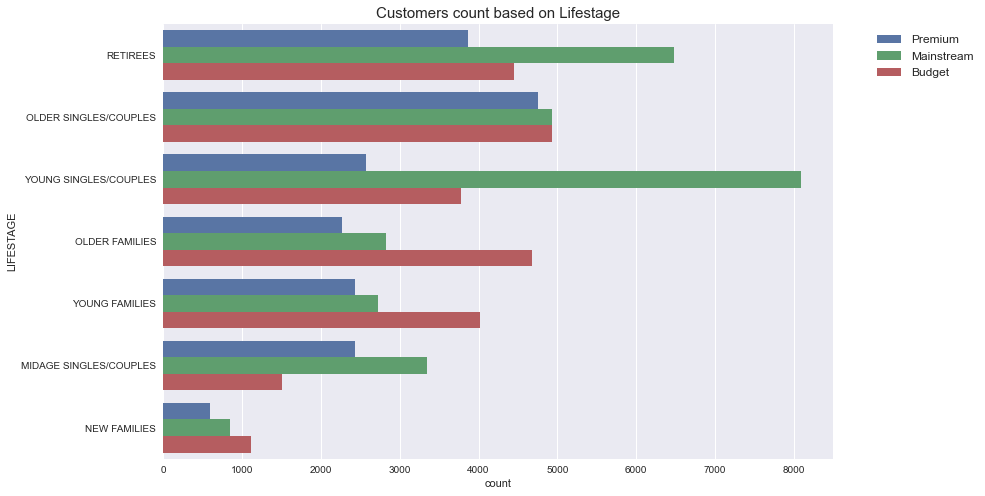

In [33]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
sb.countplot(y=unique_members_df['LIFESTAGE'],order=unique_members_df['LIFESTAGE'].value_counts().index
             ,hue = unique_members_df['PREMIUM_CUSTOMER'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 12})
plt.title('Customers count based on Lifestage',fontsize=15);

New Families are very few for all segmentations compared to others , while most of Young Sinlges/couples and Retiers are of the mainstream segmentation , while the Families in general are most on the Budget Customer type

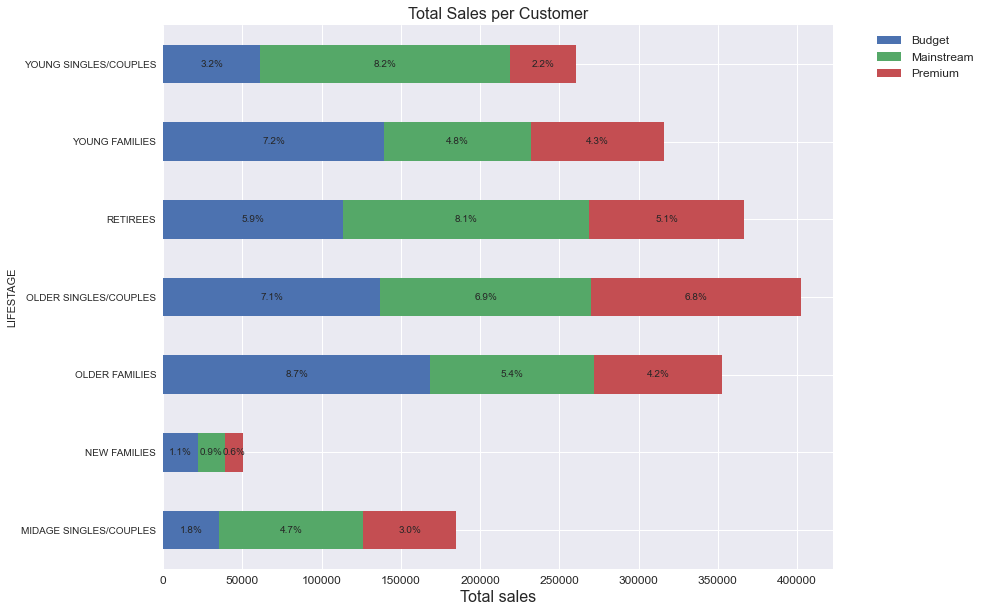

In [103]:
table = pd.pivot_table(new_df,values='TOT_SALES',index='LIFESTAGE',columns=['PREMIUM_CUSTOMER']
                       ,aggfunc=np.sum)
ax=table.plot(stacked=True,kind='barh',figsize=(12,10))
plt.style.use('seaborn')

index_list = table.index.values
total_sales = new_df['TOT_SALES'].sum()

for i in table.index :
    tot_x = 0
    for j in table.columns:
        
        ratio = (table.loc[(i)][j])/ total_sales
        x_pos = table.loc[(i)][j]+ tot_x
        tot_x += table.loc[(i)][j]
        plt.text(x = x_pos - table.loc[(i)][j]/2, y = np.where(index_list == i)[0][0]
                 ,s= '%.1f'%(ratio*100)+'%' ,va='center', ha='center', size=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 12})
plt.xlabel('Total sales',fontsize=16)
plt.xticks(fontsize=12)
plt.title('Total Sales per Customer',fontsize=16);

### what is the Sum of Total sales per customer type?
> #### According to the total sales New Families make small sales due to their small count while Young Singles/Couples make average total sales despite being a large portion of the total customers population , and the Older single/couples spend the most on total sales, and the Budget Older Families are very valuable customers they spend alot on total sales with reference to their numbers.

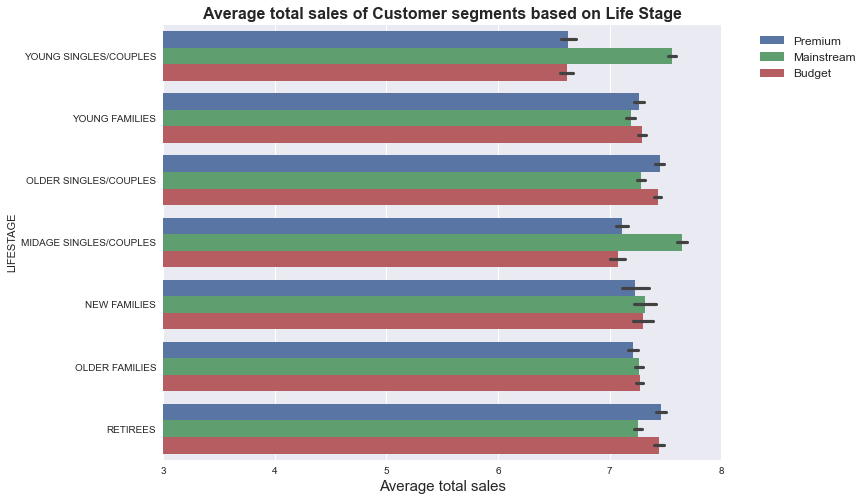

In [127]:
plt.figure(figsize = [10, 8])
plt.style.use('seaborn')
sb.barplot(data=new_df , y='LIFESTAGE',x='TOT_SALES',hue='PREMIUM_CUSTOMER')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 12})
plt.xlabel('Average total sales',fontsize=15)
plt.title('Average total sales of Customer segments based on Life Stage',fontsize=16, weight='bold')
plt.xlim(3,8);

### What is the average total sales per customer?
>#### Young single/couples and Midage single/couples of mainstream segmentation make the highest average total sales while Young single/couples of budget and premium segmentation make the lowest average total sales

#### let's see How many products each Customer type bought

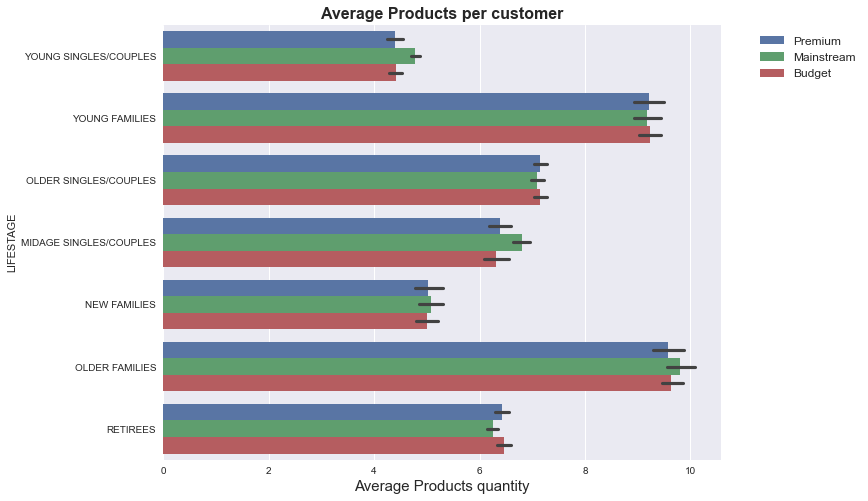

In [126]:
unique_customers = new_df.groupby('LYLTY_CARD_NBR')[['PROD_QTY','LIFESTAGE','PREMIUM_CUSTOMER']].agg({'PROD_QTY': 'sum'
                                                                                   ,'LIFESTAGE':lambda x:x.unique(),'PREMIUM_CUSTOMER':lambda x:x.unique()})

plt.figure(figsize = [10, 8])
plt.style.use('seaborn')
sb.barplot(data=unique_customers , y='LIFESTAGE',x='PROD_QTY',hue='PREMIUM_CUSTOMER')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 12})
plt.xlabel('Average Products quantity',fontsize=15)
plt.title('Average Products per customer',fontsize=16, weight='bold');

Older Families and Young Families bought more products on average while young Single/couples bought fewer products

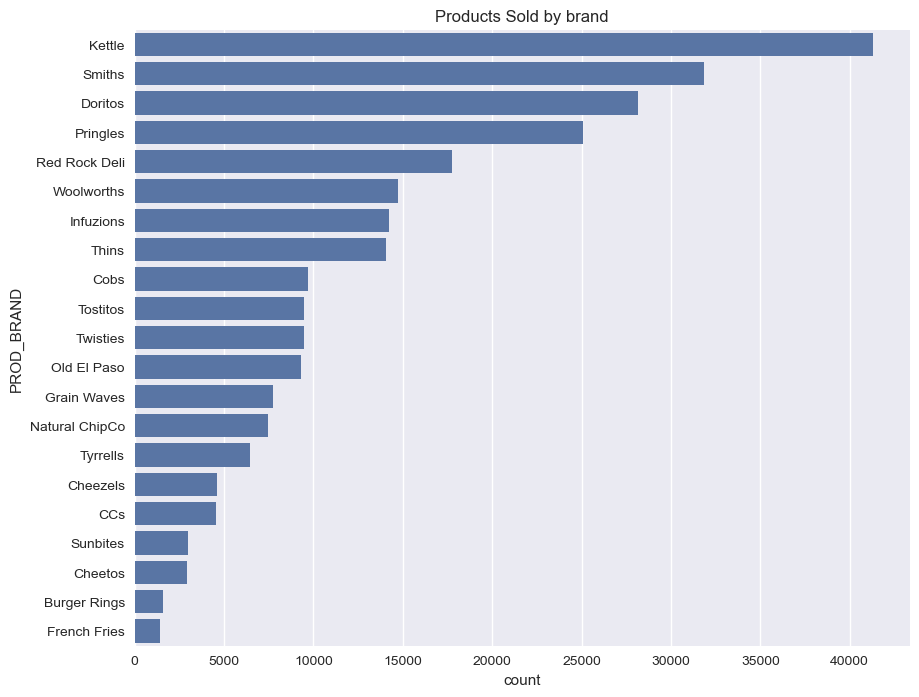

In [75]:
plt.figure(figsize=(10,8))
plt.style.use('seaborn')
sb.countplot(y=new_df['PROD_BRAND'],color = base_color , order= new_df['PROD_BRAND'].value_counts().index)
plt.title('Products Sold by brand');

### What is the most favorite product brand ?
>#### Kettle , smiths and Doritos are the most favorite brands while Burger rings , cheetos , and french fries are the least favorite

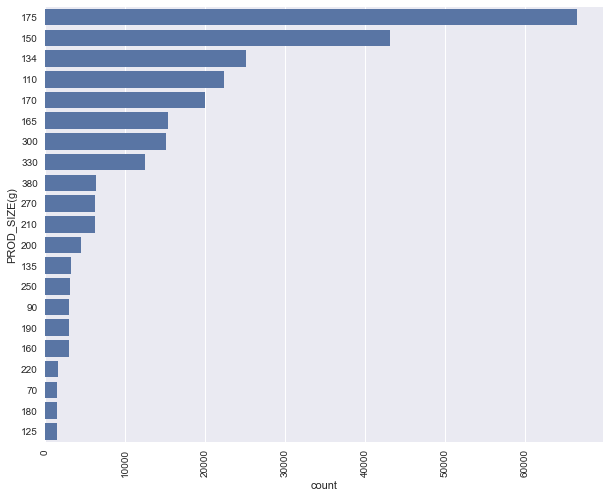

In [35]:
plt.figure(figsize=(10,8))
plt.style.use('seaborn')
sb.countplot(y=new_df['PROD_SIZE(g)'],color = base_color , order= new_df['PROD_SIZE(g)'].value_counts().index)
plt.xticks(rotation=90);

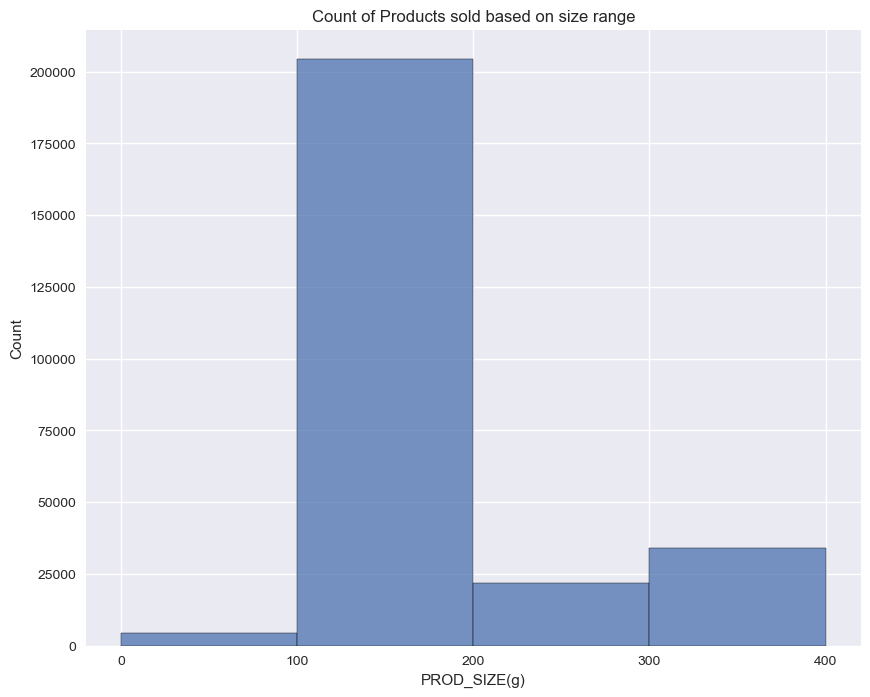

In [74]:
plt.figure(figsize=(10,8))
plt.style.use('seaborn')
bins = np.arange(0,500,100)
sb.histplot(data=new_df,x=new_df['PROD_SIZE(g)'].astype('int'),bins = bins)
plt.xticks(bins,bins)
plt.title("Count of Products sold based on size range");

### What is the most favorite product size?
>#### Prodcut of sizes 175,150,134 are the most favorite , while 125,180 and 70g are the least favorite but they may be related not favorite brands , but when we compare ranges we will find that product size from 100g to 200g are the most favorite

#### Let's see the stores with heighest and lowest profits ?

### Which stores make the heighst total sales?

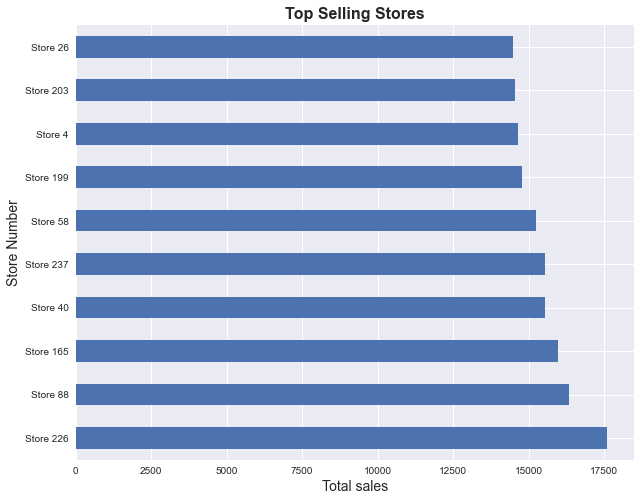

In [119]:
plt.figure(figsize=(10,8))
plt.style.use('seaborn')
stores_data = new_df.groupby('STORE_NBR')['TOT_SALES'].sum()
stores_data.nlargest(10).plot(kind='barh')
plt.ylabel('Store Number',fontsize=14)
plt.xlabel('Total sales',fontsize=14)
plt.title('Top Selling Stores',fontsize=16,weight='bold');

### Which stores make the least total sales?

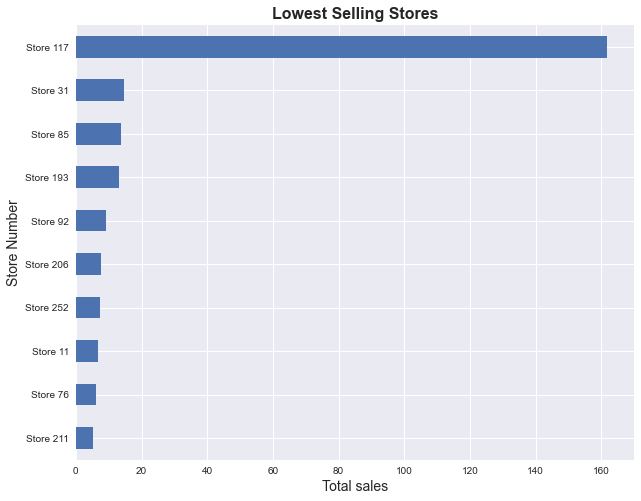

In [120]:
plt.figure(figsize=(10,8))
stores_data = new_df.groupby('STORE_NBR')['TOT_SALES'].sum()
plt.style.use('seaborn')
stores_data.nsmallest(10).plot(kind='barh')
plt.ylabel('Store Number',fontsize=14)
plt.xlabel('Total sales',fontsize=14)
plt.title('Lowest Selling Stores',fontsize=16,weight='bold');

#### Now i want to analysis Sales and Transactions across the year to see when whey were high or low?

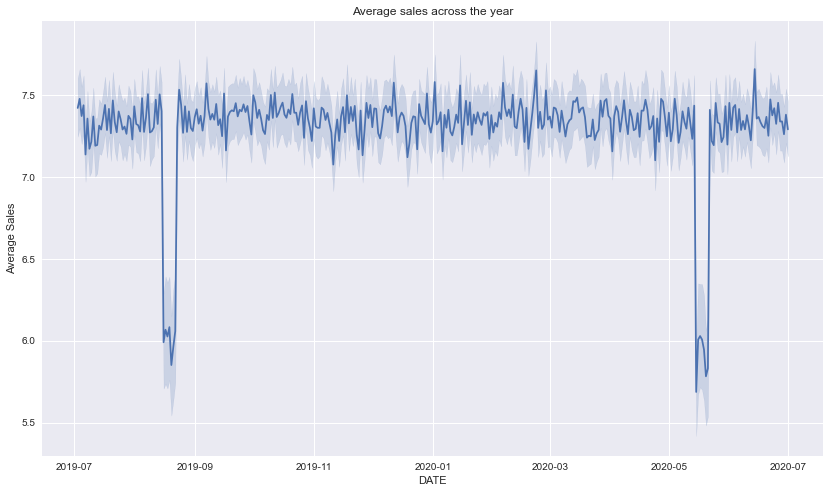

In [124]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn')
sb.lineplot(x= new_df['DATE'],y=new_df['TOT_SALES'])
plt.ylabel('Average Sales')
plt.title('Average sales across the year');

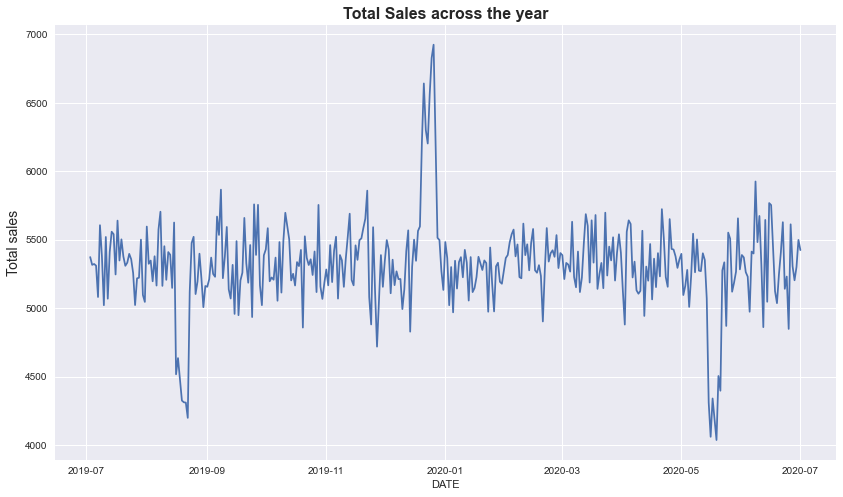

In [39]:
date_df = new_df.groupby('DATE')['TOT_SALES'].sum()
plt.figure(figsize=(14,8))
plt.style.use('seaborn')
sb.lineplot(x= date_df.index,y=date_df.values)
plt.ylabel('Total sales',fontsize=14)
plt.title('Total Sales across the year',fontsize=16,weight='bold');

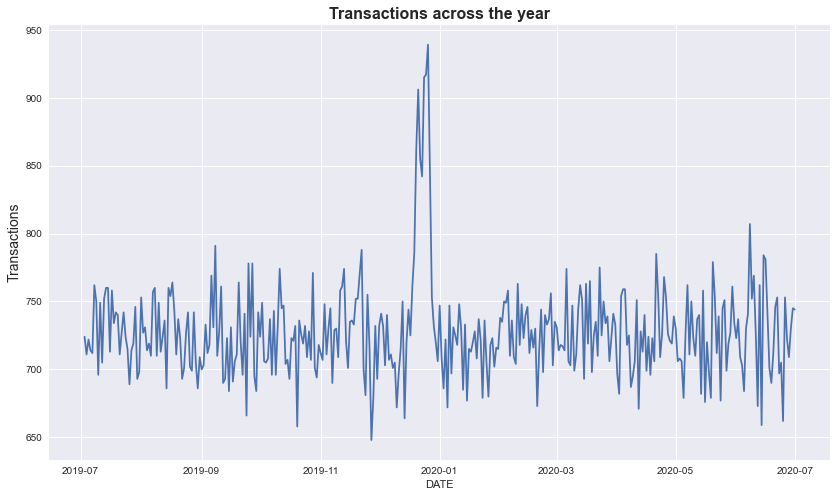

In [29]:
trans_date_df = new_df.groupby('DATE')['TXN_ID'].count()
plt.figure(figsize=(14,8))
plt.style.use('seaborn')
sb.lineplot(x= trans_date_df.index,y=trans_date_df.values)
plt.ylabel('Transactions',fontsize=14)
plt.title('Transactions across the year',fontsize=16,weight='bold');

### At what date Sales and transactions were the heighst?
>#### We can see that at the end of december 2019 both transactions and total sales were very high as then were the holidays , while at the end of august 2019 and may 2020 the total sales were low despite having the same average transactions rate

## Conclusion:
### According to customers segmentation :

* We need to attract more new Families customers as they are the least category but they make good average sales.
* We need to Urge the existing Young single/couples especially the Premium and Budget to make more transactions with more total sales.
* Budget Older Families are very valuable customers as they spend alot on total sales with reference to their numbers.

### Top product size :
* 175g 
* 150g
* 134g

### Least product size :
* 125g
* 180g
* 70g

And in general sizes between 100 and 200g are the most favorite 

### Top prduct brand:
* Kettle
* Smiths
* Pringles

### Least Product brand:
* Cheetos
* Burger rings
* French Fries

### Dates with highest sales:
* December 2019

### Dates with lowest sales:
* august 2019 and may 2020